<a href="https://colab.research.google.com/github/Brackly/Diabetes-predection-using-artificial-neural-networks/blob/main/retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [145]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [146]:
data=pd.read_csv('/content/sample_data/diabetes.csv')

In [147]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [149]:
data.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
419,3,129,64,29,115,26.4,0.219,28,1
587,6,103,66,0,0,24.3,0.249,29,0
646,1,167,74,17,144,23.4,0.447,33,1
211,0,147,85,54,0,42.8,0.375,24,0
411,1,112,72,30,176,34.4,0.528,25,0
680,2,56,56,28,45,24.2,0.332,22,0
599,1,109,38,18,120,23.1,0.407,26,0
344,8,95,72,0,0,36.8,0.485,57,0
589,0,73,0,0,0,21.1,0.342,25,0
722,1,149,68,29,127,29.3,0.349,42,1


In [150]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [151]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [152]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [153]:
data.corr()['Outcome']

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

In [154]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [155]:
data.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [156]:
data.duplicated().sum()

0

In [157]:
#sns.pairplot(data=data)

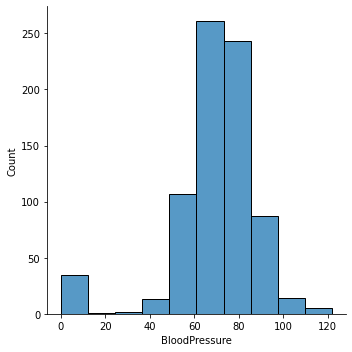

In [158]:
sns.displot(data['BloodPressure'], bins=10)

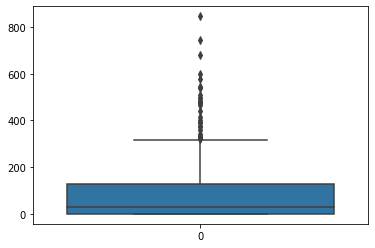

In [159]:
sns.boxplot(data=data['Insulin'])

In [160]:
data.iloc[:,1:4]=data.iloc[:,1:4].replace(0.0,np.nan)

In [161]:
data.iloc[:,5:6]=data.iloc[:,5:6].replace(0.0,np.nan)

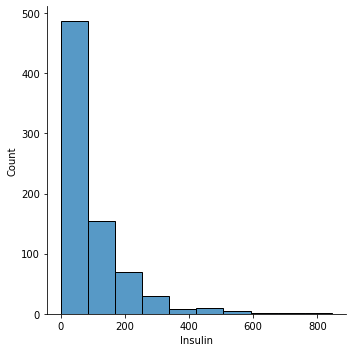

In [162]:
sns.displot(data['Insulin'], bins=10)

In [163]:
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                       0
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [164]:
columns=data.columns
columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [165]:
def remove_outliers(column,data):
  q1=data[column].quantile(.25)
  q3=data[column].quantile(.75)
  IQR=q3-q1
  lower= q1-(IQR*1.5)
  upper= q3+(IQR*1.5)
  print(f"Lower limit is {lower}, Upper limit is {upper}")
  outliers_shape=data[(data[column]<lower) | (data[column]>upper)].shape[0]
  print(f" Number of outliers: {outliers_shape}")
  data=data[(data[column]>lower) & (data[column]<upper)]
  print("Removing outliers....")
  outliers_shap=data[(data[column]<lower) | (data[column]>upper)].shape[0]
  print(outliers_shap)
  return data

In [166]:
column=data.columns[:-1]
for column in columns:
  print(f"--- {column} ---")
  data=remove_outliers(column,data) 
  print("----------------")

--- Pregnancies ---
Lower limit is -6.5, Upper limit is 13.5
 Number of outliers: 4
Removing outliers....
0
----------------
--- Glucose ---
Lower limit is 36.75, Upper limit is 202.75
 Number of outliers: 0
Removing outliers....
0
----------------
--- BloodPressure ---
Lower limit is 40.0, Upper limit is 104.0
 Number of outliers: 14
Removing outliers....
0
----------------
--- SkinThickness ---
Lower limit is -0.875, Upper limit is 58.125
 Number of outliers: 3
Removing outliers....
0
----------------
--- Insulin ---
Lower limit is -248.25, Upper limit is 413.75
 Number of outliers: 19
Removing outliers....
0
----------------
--- BMI ---
Lower limit is 14.3125, Upper limit is 49.8125
 Number of outliers: 3
Removing outliers....
0
----------------
--- DiabetesPedigreeFunction ---
Lower limit is -0.32950000000000007, Upper limit is 1.2385000000000002
 Number of outliers: 17
Removing outliers....
0
----------------
--- Age ---
Lower limit is 2.0, Upper limit is 58.0
 Number of outliers:

In [167]:
def fill_columns(data,column):
  data[column]=data[column].fillna(data[column].mean())
  return data

In [168]:
for column in columns:
  data=fill_columns(data,column)

In [169]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [170]:
data.sample(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
449,0,120.0,74.0,18.0,63,30.5,0.285,26,0
156,2,99.0,52.0,15.0,94,24.6,0.637,21,0
751,1,121.0,78.0,39.0,74,39.0,0.261,28,0
442,4,117.0,64.0,27.0,120,33.2,0.230,24,0
51,1,101.0,50.0,15.0,36,24.2,0.526,26,0
365,5,99.0,54.0,28.0,83,34.0,0.499,30,0
649,0,107.0,60.0,25.0,0,26.4,0.133,23,0
427,1,181.0,64.0,30.0,180,34.1,0.328,38,1
585,1,93.0,56.0,11.0,0,22.5,0.417,22,0
142,2,108.0,52.0,26.0,63,32.5,0.318,22,0


In [171]:
data.shape

(459, 9)

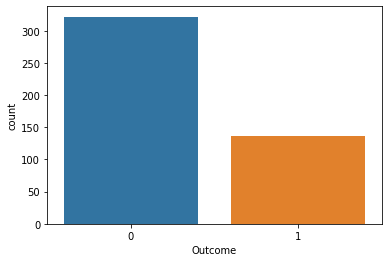

In [172]:
sns.countplot(data=data,x='Outcome')

In [173]:
x=data.copy()
x.drop('Outcome',axis=1,inplace=True)
y=data['Outcome']

In [174]:
from imblearn.combine import SMOTETomek

smk=SMOTETomek(random_state=123)

x_res,y_res=smk.fit_resample(x,y)

In [175]:
import  plotly.express as px
fig=px.histogram(x_res,x=y_res,color=y_res)
fig.update_layout(bargap=0.5)
fig.show()

In [176]:
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
x=minmax_scale(x_res)


In [177]:
X_train,X_test,y_train,y_test=train_test_split(x,y_res,test_size=.2,random_state=123)

In [209]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation,Dense,Dropout
from keras.optimizers import Adam
from keras.losses import SparseCategoricalCrossentropy
from  keras.regularizers import L2

In [210]:
input_shape=X_train.shape[1]
input_shape

8

In [235]:
model=Sequential([
    Dense(units=64,activation='relu',input_shape=(input_shape,)),
    Dropout(.2),
    Dense(units=256,activation='relu'),
    Dropout(.2),
    Dense(units=128,activation='relu',kernel_regularizer=L2(0.001)),
    Dropout(.2),
    Dense(units=2,activation='softmax'),
])

model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_89 (Dense)            (None, 64)                576       
                                                                 
 dropout_12 (Dropout)        (None, 64)                0         
                                                                 
 dense_90 (Dense)            (None, 256)               16640     
                                                                 
 dropout_13 (Dropout)        (None, 256)               0         
                                                                 
 dense_91 (Dense)            (None, 128)               32896     
                                                                 
 dropout_14 (Dropout)        (None, 128)               0         
                                                                 
 dense_92 (Dense)            (None, 2)               

In [236]:
model.compile(optimizer=Adam(learning_rate=0.001),loss=SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [237]:
model.fit(X_train,y_train,batch_size=32,epochs=40)

Epoch 1/40
16/16 [==============================] - 1s 3ms/step - loss: 0.8383 - accuracy: 0.4780
Epoch 2/40
16/16 [==============================] - 0s 3ms/step - loss: 0.7749 - accuracy: 0.6180
Epoch 3/40
16/16 [==============================] - 0s 3ms/step - loss: 0.7055 - accuracy: 0.7420
Epoch 4/40
16/16 [==============================] - 0s 3ms/step - loss: 0.6386 - accuracy: 0.7460
Epoch 5/40
16/16 [==============================] - 0s 3ms/step - loss: 0.5937 - accuracy: 0.7840
Epoch 6/40
16/16 [==============================] - 0s 3ms/step - loss: 0.5649 - accuracy: 0.7640
Epoch 7/40
16/16 [==============================] - 0s 3ms/step - loss: 0.5447 - accuracy: 0.7800
Epoch 8/40
16/16 [==============================] - 0s 4ms/step - loss: 0.5334 - accuracy: 0.7880
Epoch 9/40
16/16 [==============================] - 0s 3ms/step - loss: 0.5127 - accuracy: 0.7900
Epoch 10/40
16/16 [==============================] - 0s 3ms/step - loss: 0.5178 - accuracy: 0.7980
Epoch 11/40
16/16 [

In [238]:
model.evaluate(X_test,y_test,batch_size=32)

4/4 [==============================] - 0s 4ms/step - loss: 0.4428 - accuracy: 0.8016


[0.44284722208976746, 0.8015872836112976]